<h1 style='color:purple' align='center'>Data Science Regression Project: Predicting Home Prices in Banglore</h1>

Dataset is downloaded from here: https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
print("number of rows", df1.shape)
df1.head()

number of rows (13320, 9)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [4]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [5]:
# df1.groupby('area_type').count()  #counts rows with non-0 values only . but will show all of the rows
# df1.groupby('area_type').agg('count')  # same output as above

#the following 2 lines have same output
# df1.groupby('area_type')['area_type'].count() #shows the count of the groups under only the column 'area_type'
df1.groupby('area_type')['area_type'].agg('count')  #return type is a panda series


area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

## data cleaning

**Drop features that are not required to build our model**

In [6]:
# df2 = df1.drop(['area_type','society','balcony','availability'],axis=0)  
#default axis is '0' = rows
# we will get error because 'area_type' is not the index for any row here


df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


<h2 style='color:blue'>Data Cleaning: Handle NA values</h2>

I can drop all the 73 rows  because we have 13k rows in the dataset

In [7]:

print(df2.isna().sum() )# there are 76 rows in which the number of bathrooms is missing. 
# df2.dropna(inplace=True) # we cant print this using  .head()
df3 = df2.dropna()
df3.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64


location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

<h2 style='color:blue'>Feature Engineering</h2>

In [8]:
# df3.size.unique() #size is a reserved word. cant use like this. it will call some funciton
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

**Add new feature(integer) for bhk (Bedrooms Hall Kitchen)**
<br>we see that the 4 bedroom and 4BHK denote the same feature value

In [9]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))  #apply operation on each cell under size column
# we split the strings in each of the cell and then take the first string which can be '4,3,2'

# df3.bhk.unique()
df3['bhk'].unique() #same as above . all the different bedroom possibilities

C:\Users\Sreyan\AppData\Local\Temp\ipykernel_2392\3790623491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))  #apply operation on each cell under size column


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

**Explore total_sqft feature**

In [10]:
#create a custom function for checking float
def is_float(x):
    try:
        float(x)  # we try to convert the given 'x' int0 float. then if x=400-600 OR 400sqft
        #then the code will throw an exception and it will go to the 'except' block below
    except:
        return False
    return True

In [11]:
2+3

5

In [12]:
df3[~df3['total_sqft'].apply(is_float)].head(10)  
# i want to get back a dataframe which contains only those cells which are not float. so ~ negate operator

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


**Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. We are going to just drop such corner cases as our the dataset is sufficiently large**

In [13]:

def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [14]:
df4 = df3.copy() #deep copy
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
# df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num) #same thing
df4 = df4[df4.total_sqft.notnull()] # i want to remove all the rows which had returned a NULL value in the total_sqfeet
#those rows might have some values like '400penrch' or same random text
#i could have converted them to different units if i wanted
df4.head(2)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4


**For below row, it shows total_sqft as 2475 which is an average of the range 2100-2850**

In [15]:
df4.loc[30] #accessing index 30

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [16]:
(2100+2850)/2

2475.0

<h2 style="color:blue">Feature Engineering</h2>

**Add new feature called price per square feet**

In [17]:
df5 = df4.copy() #deep copy 
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [18]:
df5_stats = df5['price_per_sqft'].describe()
df5_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [19]:
# df5.to_csv("bhp.csv",index=False) #not necessary

Checking how many unique locations are there. and also which location has the most. Too many locations. **Dimensionality curse**

In [20]:
print("\nUnique locations:" ,df4['location'].unique().size) #checking how many unique locations
#USING GROUP BY
df4.groupby('location')['location'].agg('count').sort_values(ascending=False)


Unique locations: 1298


location
Whitefield             532
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         264
Thanisandra            232
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1298, dtype: int64

**Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations**
<br>same thing as above but here we use the **value_counts** function. 
<br>value_count and grouby.count() both returns a series. But groub_by has column name too

In [21]:
df5.location = df5.location.apply(lambda x: x.strip()) #Strip extra spaces
location_stats = df5['location'].value_counts(ascending=False) # by default sort=True, ascending=True

location_stats #the length decreased to 1287 after we removed white spaces

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [22]:
location_stats.values.sum()  

13200

Location_stats is a 'series' which has 'whitefield' as a row index name. and the values are the count of such locaitons, which is an integer. so we can directly apply such condition >10 on such panda series

In [23]:
len(location_stats[location_stats>10]) #number of locaitons with more than 10 houses

240

In [24]:
len(location_stats)

1287

In [25]:
len(location_stats[location_stats<=10]) #locations with less than 10 houses

1047

<h2 style="color:blue">Dimensionality Reduction</h2>

**Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns**

In [26]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [27]:
len(df5.location.unique())

1287

In [28]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
#any location which has <10 houses are labelled as 'other'
len(df5.location.unique())

241

In [29]:
# df5.head(10)
df5.iloc[8:10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


<h2 style="color:blue">Outlier Removal Using Business Logic</h2>

**A business manager (who has expertise in real estate), will suggest that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft). So if we have for example 400 sqft apartment with 2 bhk then that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft**

In [30]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


**Check above data points. We have 6 bhk apartment with 1020 sqft. Another one is 8 bhk and total sqft is 600. These are clear data errors that can be removed safely**

In [31]:
print(((df5.total_sqft/df5.bhk)<300).head()) #will just return a boolean array
df5[(df5.total_sqft/df5.bhk)<300].head() #all the OUTLIERS and abnormalities

0    False
1    False
2    False
3    False
4    False
dtype: bool


,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [32]:
print(df5.shape)

(13200, 7)


In [33]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)] # keeping all the houses with the sqfeet/bedroom >=300
print(df6.shape)

(12456, 7)


### Filtering
when we want our model to have a normal standard deviation then we want our data set prices to lie between mean and 1 standard deviaon. we dont want to collect uncessary outliers in prices. we dont want to  have extremely high priced property 

<h2 style='color:blue'>Outlier Removal Using Standard Deviation and Mean</h2>

In [34]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

**Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation**

In [35]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        #key is the name(string) of the location(the row index in the orginal data becomes the column name in the current series)
        #subdf are the values under that location. subdf is a dataframe
#         print(type(key))
        m = np.mean(subdf.price_per_sqft) #mean for the house prices for that  particular location
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10242, 7)

**Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like**

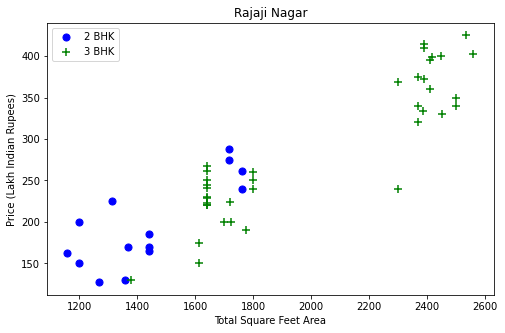

In [36]:
def plot_scatter_chart(df,location): #we check the data for a particular location
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (8,5)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")#we check the data for a particular location

2BHK apartment (blue ) is higher than 3BHK forthe same sq feet area

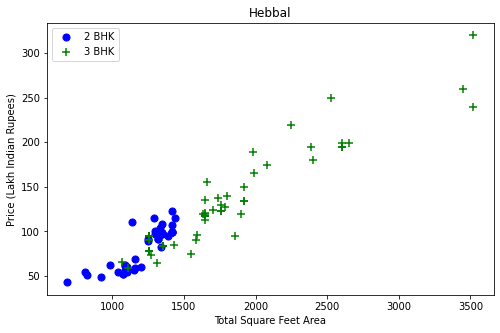

In [37]:
plot_scatter_chart(df7,"Hebbal")
matplotlib.rcParams['figure.figsize'] = (8,5)

**We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.**
```
{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
```
**Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment**

In [38]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):  #we all rows for a location into location_df data frame
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):  #for a location df, we group the houses based on BHK
            #for each 'bhk' integer value, we have the houses corresponding to it in bhk_df
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft), #we store the mean of all the 2BHK houses for a location 'gandhinagar'
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            #lets say bhk=3 in this for loop
            stats = bhk_stats.get(bhk-1) 
            #we store the bhk_stats for a (3-1)=2 BHK apartment
            #then among the 3BHK apartments we check that which houses have the price < mean of the 2BHK apartment
            #the 3BHK apartment cannot have a price less than the general price(mean price) of the 2BHK apartment in the same location
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape #we have 7k houses left now

(7317, 7)

**Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties**

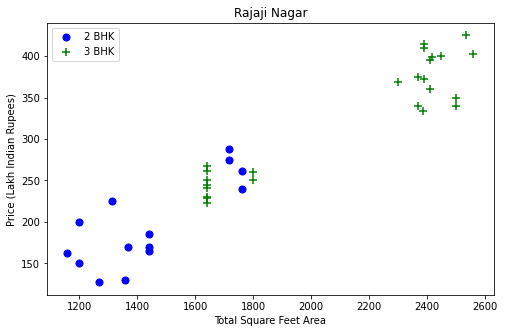

In [39]:
plot_scatter_chart(df8,"Rajaji Nagar")
matplotlib.rcParams['figure.figsize'] = (8,5)
#we can see that the 3BHK flats which costed higher than 2BHK are removed for the same locaiton. 
#some of them might still be there

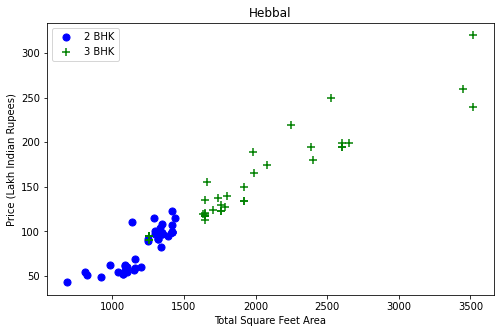

In [40]:
plot_scatter_chart(df8,"Hebbal")  #we use a custom function 
matplotlib.rcParams['figure.figsize'] = (8,5)

**Based on above charts we can see that data points highlighted in red below are outliers and they are being removed due to remove_bhk_outliers function**

<h3 style='color:green'>Before and after outlier removal: Rajaji Nagar</h3>

<figure padding: 4px>
   <img src="rajaji_nagar_outliers.png" width="900" height="500"></img>
 </figure>

<h3 style='color:green'>Before and after outlier removal: Hebbal</h3>

<img src="hebbal_outliers.png"></img>

Text(0, 0.5, 'Count')

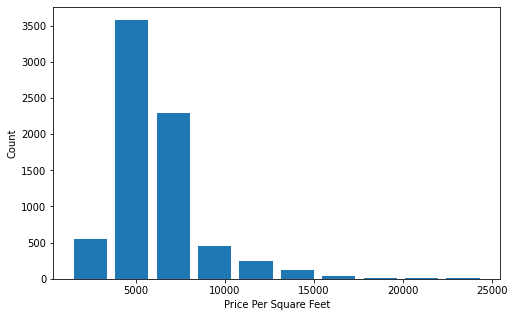

In [41]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8,5)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")
#we can see our dataset has a normal distribution

<h2 style='color:blue'>Outlier Removal Using Bathrooms Feature</h2>

In [42]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

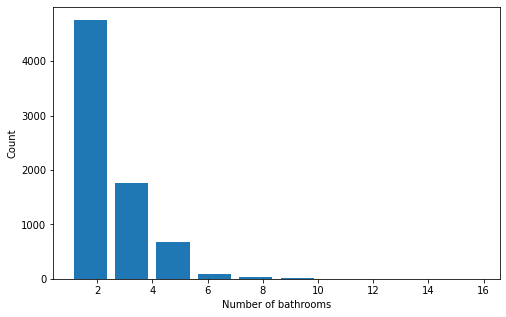

In [43]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [44]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


**It is unusual to have 2 more bathrooms than number of bedrooms in a home**

In [45]:
df8[df8.bath>df8.bhk+2]  #mark the houses with bathrooms = bedrooms+2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


**IF we have 4 bedroom home and even if we have bathroom in all 4 rooms plus one guest bathroom, we will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed**

In [46]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7239, 7)

In [47]:
df9.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491


### Feature removal
We can drop the 'size' because we have BHK. and we use 'price_per_sqft' just for outlier detection so we do not need this

In [48]:

df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


<h2 style='color:blue'>Use One Hot Encoding For Location</h2>
<br>The model cannot interpret text values of the location like jayanagar. so we will convert them into numbers and use them as features by one-hot encoding , which vectors are like [1 0 0 0 0]. <br>its like for a particular feature we can use a vector of length of the unque number of finite locations possible(let's say length=N). and then we just indicate them by placing a '1' in that specific location row/column.<br>it is like we create N features and only one of them will be activated by '1' for each location. similarly when we develop the web-app, we will activate only that corresponding location's position among those N features we created by one-hot encoding

In [49]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
#we drop one of the one-hot encoding columns to prevent dummy variable trap
#we drop the 'others' column
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns') #concantenate the columns along the column  axis
df11.head()
# we add the 'dummies' location one-hot vectors after the original data set,so it shows on the right

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df12 = df11.drop('location',axis='columns') #we dont need the 'locaation' anymore
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h2 style='color:blue'>Build a Model Now...</h2>

In [52]:
df12.shape

(7239, 244)

In [53]:
X = df12.drop(['price'],axis='columns') #X should contain only independent variables (features)
#so we drop the 'price' vairable column
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
X.shape

(7239, 243)

In [55]:
y = df12.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [56]:
len(y)

7239

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10) #80% train data

In [58]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8629132245229443

Linear regression is a linear model, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y).

<h2 style='color:blue'>Use K Fold cross validation to measure accuracy of our LinearRegression model</h2>

In [59]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
#https://stackoverflow.com/questions/34731421/whats-the-difference-between-kfold-and-shufflesplit-cv

#we make 5 iterations. we choose a group(fold) and test/train using for 5 different times
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) #random_state=0: Use fixed state for so training can be repeated later
print(type(cv))

cross_val_score(LinearRegression(), X, y, cv=cv) #array of 5 scores using the linear_regression estimator
#we get more than 80% accuracy in each iteration
#The score computed at each CV iteration is the score method of the estimator.

<class 'sklearn.model_selection._split.ShuffleSplit'>


array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

**We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose**

<h2 style='color:blue'>Find best model using GridSearchCV</h2>

In [60]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    #algos is just a dictionary
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) 
    #this object can generate the test and train set for 5 different iterations
    
    #funciton for creating different models and storing in 'gs' object from sklearn
    
    for algo_name, config in algos.items(): #algos is just a dictionary
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)         
        #for corss validation we use the cv object. thats 5-fold cross validation here
        
        
        gs.fit(X,y)
        #scores from different algorithms areappended to this list scores[] where each element is a dictionary
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })    
        #for-loop ends at this indentation
    
#     return pd.DataFrame(scores) #same output as the below statement
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
    #end of function
        

find_best_model_using_gridsearchcv(X,y)

C:\Users\Sreyan\anaconda3\envs\ml_dl\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Sreyan\anaconda3\envs\ml_dl\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline impor

,model,best_score,best_params
0,linear_regression,0.847796,{'normalize': False}
1,lasso,0.726764,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.693206,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


**Based on above results we can say that LinearRegression gives the best score. Hence we will use that.**

<h2 style='color:blue'>Test the model for few properties</h2>

In [61]:
print(type(X.columns))
X.columns

<class 'pandas.core.indexes.base.Index'>


Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [62]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0] 
    # we find column number in which the name of the column is the same as the location
    #[0][0] gives us the first occurence?

    x = np.zeros(len(X.columns))
    x[0] = sqft #we put sqft in the 1st column
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:  #if the location is not the 1st location then it will have some index value 'loc_index'
        x[loc_index] = 1 # we select that particular location

    return lr_clf.predict([x])[0]  
    # predict() returns a 2D array because generally then can be multiple input rows. 
    #but we have only 1 element
    #we had already trained the lr_clf earlier with 86% accuracy
#     return lr_clf.predict([x])# if we remove[0] then it will give me a 1 element list/array

In [63]:
predict_price('1st Phase JP Nagar',1000, 2, 2) #83 lacs. 2 batrhoom,2 bedroom

C:\Users\Sreyan\anaconda3\envs\ml_dl\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.8657025831229

In [64]:
# print(np.where(X.columns=='1st Phase JP Nagar')[0][0] )
# print(np.where(X.columns=='1st Phase JP Nagar') )  #returns a 2D numpy array with the correct index. 
#here it will be a 1x1 2D array
print(predict_price('1st Phase JP Nagar',1000, 3, 3)) 

86.08062284987055


C:\Users\Sreyan\anaconda3\envs\ml_dl\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [65]:
predict_price('Indira Nagar',1000, 2, 2)  

C:\Users\Sreyan\anaconda3\envs\ml_dl\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


193.31197733179914

In [66]:
predict_price('Indira Nagar',1000, 3, 3) 

C:\Users\Sreyan\anaconda3\envs\ml_dl\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


195.52689759854678

<h2 style='color:blue'>Export the tested model to a pickle file</h2>

In [67]:
import pickle
with open('./model/banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

with open('./server/artifacts/banglore_home_prices_model.pickle','wb') as f:  # for web server
    pickle.dump(lr_clf,f)

print("Saved model successfully")

Saved model successfully


<h2 style='color:blue'>Export location and column information to a file that will be useful later on in our prediction application</h2>

In [68]:
#we also need the way the columns are stored. the columns also contain the 'locations'
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns] #convert the column names into lower case
}
with open("./model/columns.json","w") as f:
    f.write(json.dumps(columns))

with open("./server/artifacts/columns.json","w") as f:
    f.write(json.dumps(columns))

print("Saved Column.json successfully")

Saved Column.json successfully
